In [75]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/water-potability/water_potability.csv


In [76]:
data=pd.read_csv('../input/water-potability/water_potability.csv')
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [77]:
data.shape

(3276, 10)

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [79]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ph', ylabel='Density'>

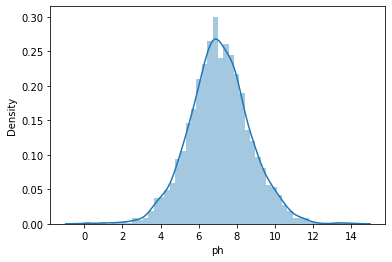

In [80]:
sns.distplot(data['ph'])



/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sulfate', ylabel='Density'>

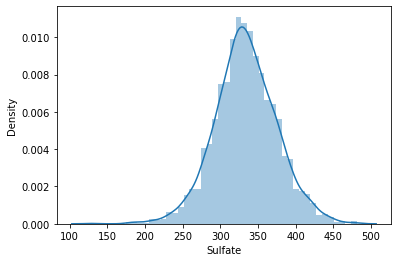

In [81]:
sns.distplot(data['Sulfate'])


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Trihalomethanes', ylabel='Density'>

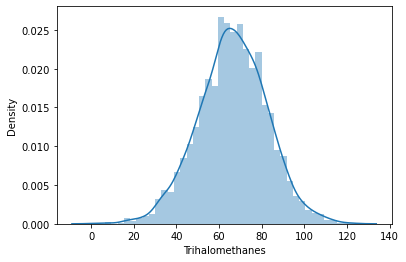

In [82]:
sns.distplot(data['Trihalomethanes'])

In [83]:
def fill_nan(data):
    for index, column in enumerate(data.columns[:9]):
        
        data[column] = data[column].fillna(data.groupby('Potability')[column].transform('mean'))
    return data
        
data = fill_nan(data)



In [84]:
data.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [85]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080855,196.369496,22014.092526,7.122277,333.785123,426.205111,14.284970,66.395671,3.966786,0.390110
std,1.469958,32.879761,8768.570828,1.583085,36.145701,80.824064,3.308162,15.769901,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.085378,196.967627,20927.833607,7.130299,334.564290,421.884968,14.218338,66.303555,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [86]:
data['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

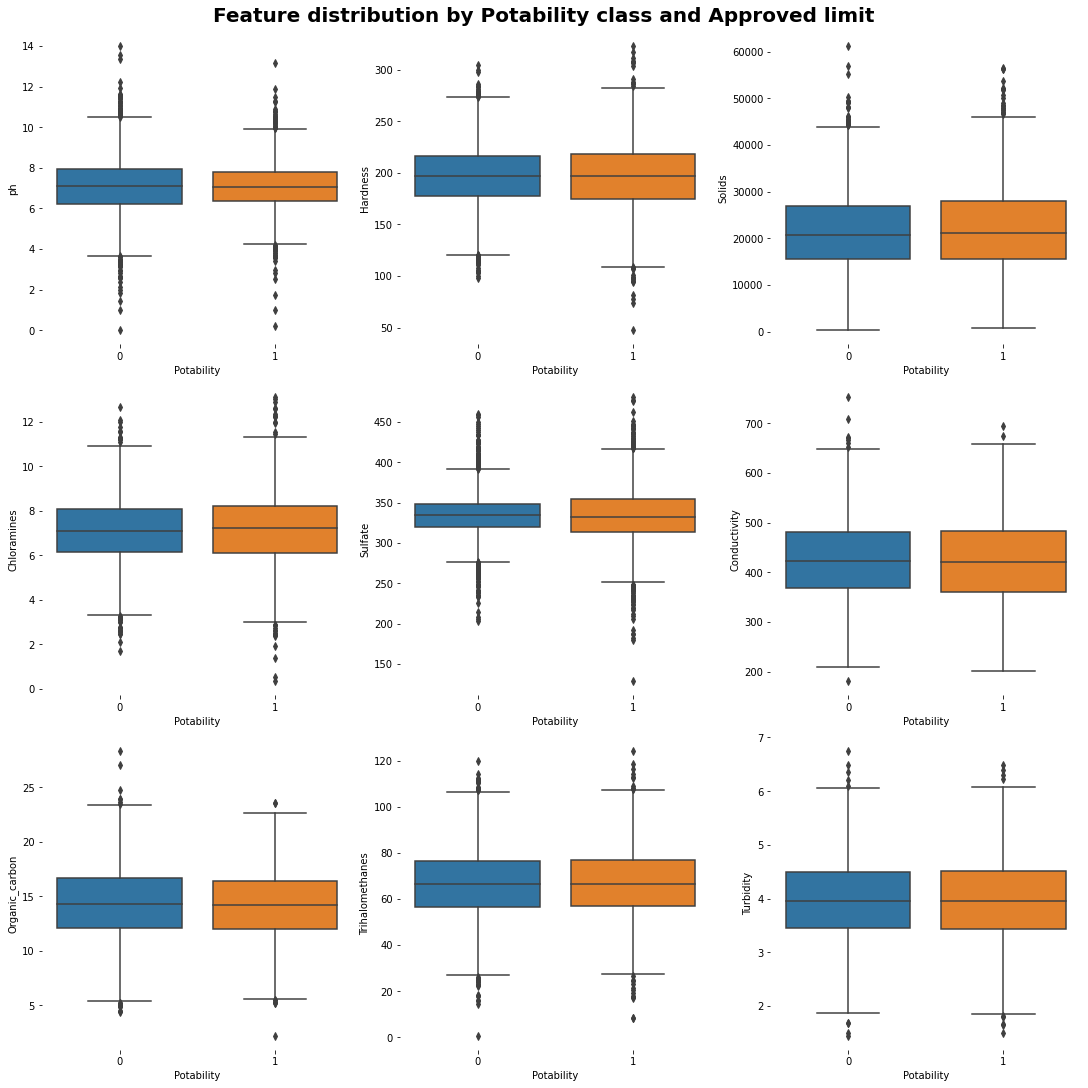

In [87]:
int_cols = data.select_dtypes(exclude=['category']).columns.to_list()
fig, ax= plt.subplots(nrows=3, ncols=3, figsize=(15,15), constrained_layout=True)
plt.suptitle('Feature distribution by Potability class and Approved limit', size=20, weight='bold')
ax=ax.flatten()
for x, i in enumerate(int_cols):
    if i == "Potability":
        continue
    sns.boxplot(data=data, y=i, x='Potability', ax=ax[x])
    for s in ['left','right','top','bottom']:
        ax[x].spines[s].set_visible(False)

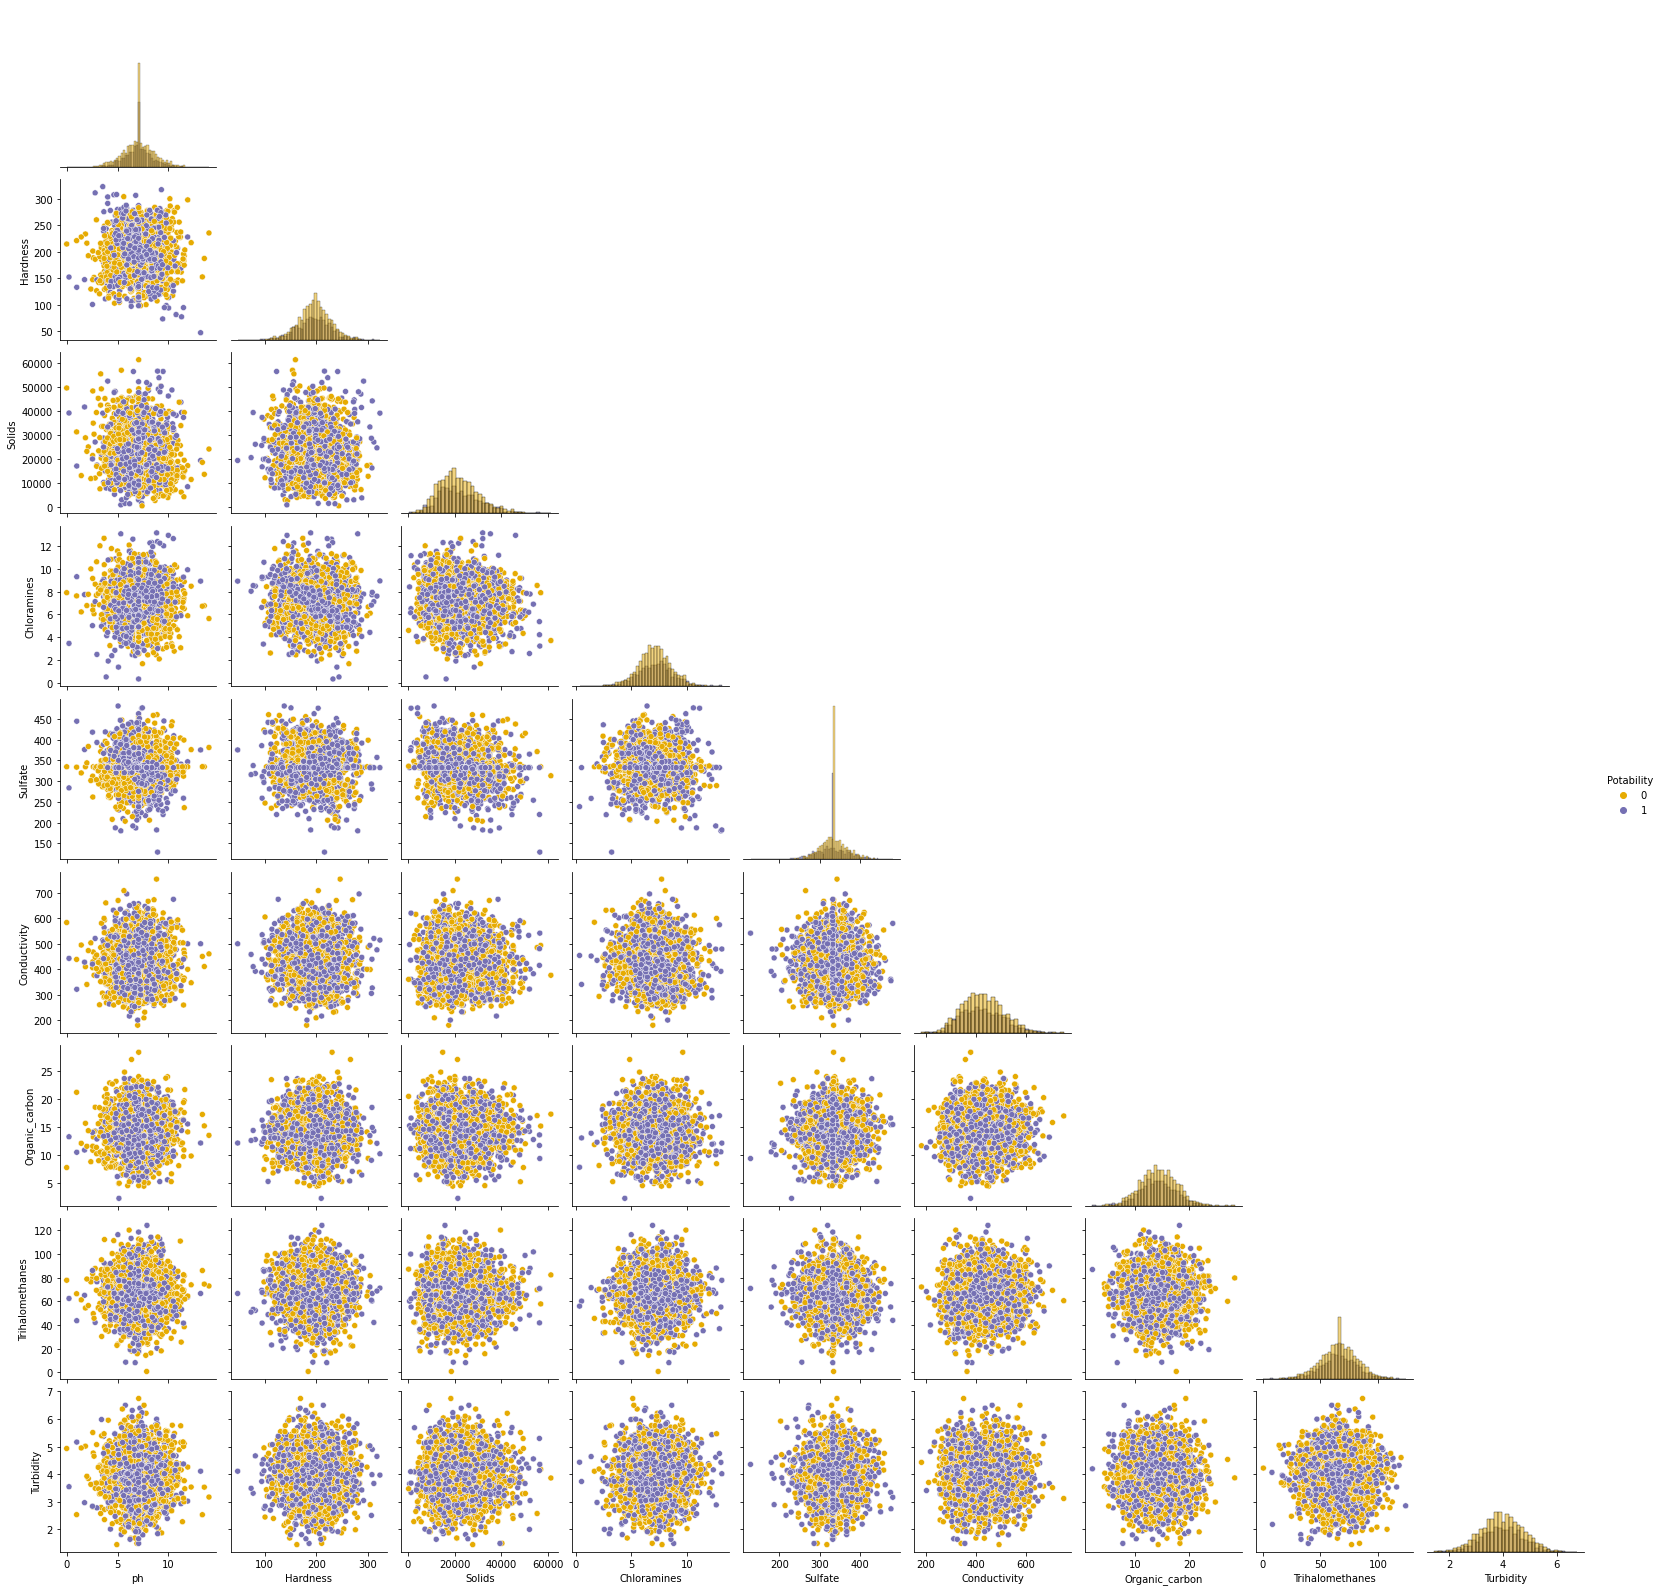

In [88]:
sns.pairplot(data=data,hue='Potability',diag_kind="hist",corner=True,palette='Dark2_r')

<AxesSubplot:>

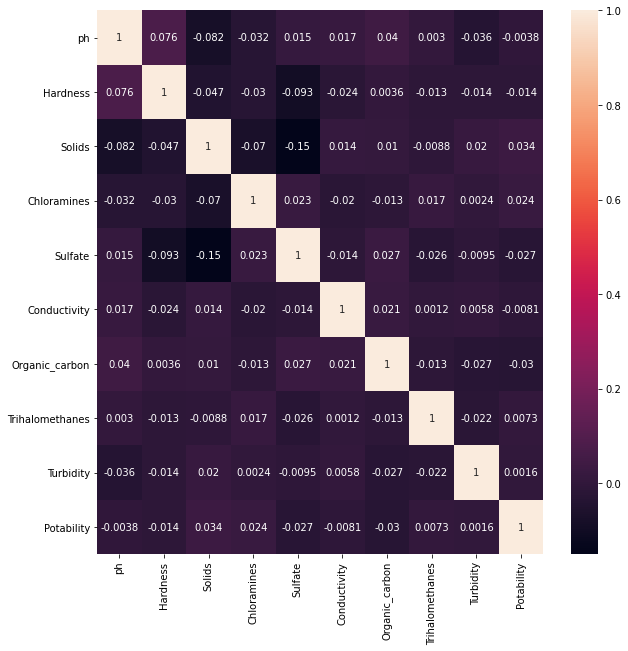

In [89]:
corr =data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

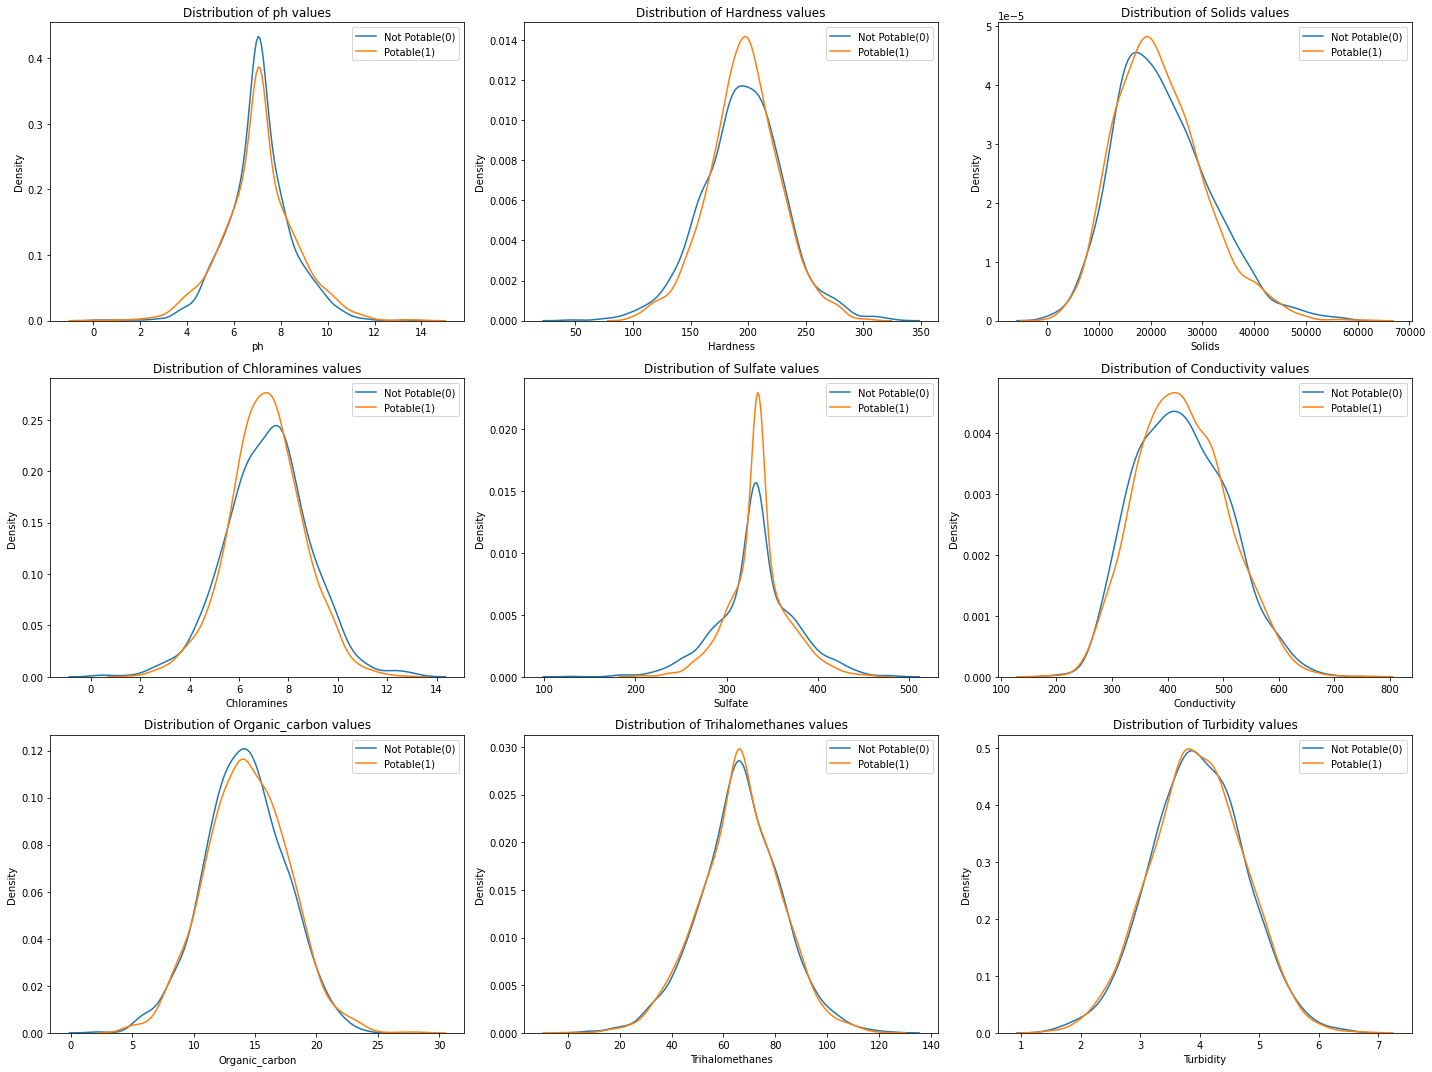

In [90]:
potable = data.query('Potability == 0')
not_potable = data.query('Potability == 1')

fig = plt.figure(figsize=(20,15))

for ax,column in enumerate(data.columns[:9]):
    plt.subplot(3,3,ax+1)
    plt.title(f'Distribution of {column} values')
    sns.kdeplot(x=not_potable[column],label='Not Potable(0)')
    sns.kdeplot(x=potable[column],label='Potable(1)')
    plt.legend(prop=dict(size=10))

    
plt.tight_layout()

In [91]:
X=data.drop(['Potability'],axis=1)

y=data['Potability']

In [92]:
from sklearn.ensemble import ExtraTreesClassifier
ex=ExtraTreesClassifier()
ex.fit(X,y)


ExtraTreesClassifier()

In [93]:
ex.feature_importances_


array([0.12732451, 0.11295237, 0.1089259 , 0.10650111, 0.15972098,
       0.0972933 , 0.09625341, 0.09668515, 0.09434327])

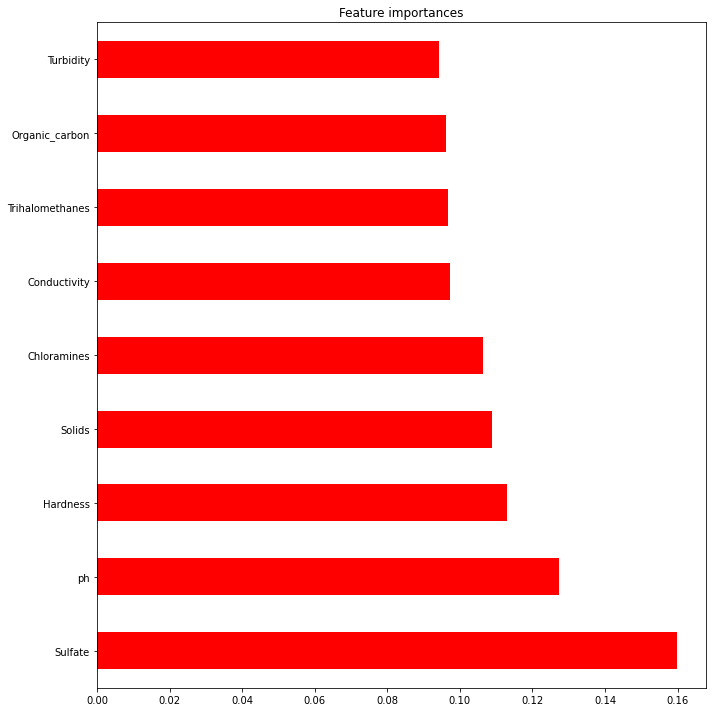

In [94]:
plt.figure(figsize=(10,10))
plt.title('Feature importances')
feat=pd.Series(ex.feature_importances_,index=X.columns)
feat.nlargest(10).plot(kind='barh', color="r", align="center")
plt.tight_layout()
plt.show()

In [95]:
from sklearn.model_selection import train_test_split ,cross_val_score, GridSearchCV,RandomizedSearchCV
X_train ,X_test,y_train ,y_test =train_test_split(X,y,test_size =.2 , random_state=42 , stratify=y)

In [96]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()

In [97]:
X_train,y_train=smote.fit_resample(X_train, y_train)

In [98]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [99]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression ,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost.sklearn import XGBClassifier


In [100]:
models = {'Logistic Regression': LogisticRegression(),
         'KNN': KNeighborsClassifier(),
         'Decision Tree': DecisionTreeClassifier(),
         'Random Forest': RandomForestClassifier(),
         'Gradient Boosting Classifier':GradientBoostingClassifier(),
         'Support Vector Machine': SVC(),
         'Stochastic Gradien Descent': SGDClassifier(),
         'Naive Bayes': GaussianNB(),
         'xgb Classifier': XGBClassifier()}

    

In [101]:
def fit_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(18)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = cross_val_score(model,
                                             X_test,
                                             y_test,
                                            scoring='accuracy',
                                            cv=5
                                            ).mean()

    return model_scores

In [102]:
model_scores = fit_score(models,X_train,X_test,y_train,y_test)

model_scores

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:29:31] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:29:32] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:29:32] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:29:32] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:29:32] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

{'Logistic Regression': 0.5914411288457091,
 'KNN': 0.5579227388387694,
 'Decision Tree': 0.7119245894055054,
 'Random Forest': 0.7591718713856117,
 'Gradient Boosting Classifier': 0.7409322229932916,
 'Support Vector Machine': 0.6402960906777702,
 'Stochastic Gradien Descent': 0.5899953735831598,
 'Naive Bayes': 0.5884455239417071,
 'xgb Classifier': 0.7332870691649317}

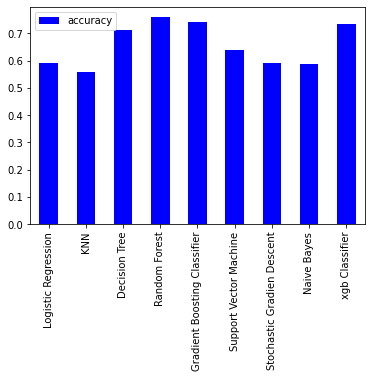

In [105]:
models = pd.DataFrame(model_scores, index=["accuracy"])
models.T.plot.bar(color="blue");


In [109]:
params = {'n_estimators': [20,30,50,100, 200, 300], 
              'max_features': ['auto', 'sqrt', 'log2'], 
              'bootstrap': [True, False], 
              'criterion':['entropy', 'gini']}

grid = GridSearchCV(RandomForestClassifier(), params, refit=True, verbose=1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  8.6min finished


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['entropy', 'gini'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [20, 30, 50, 100, 200, 300]},
             verbose=1)

In [110]:
grid.best_params_


{'bootstrap': True,
 'criterion': 'entropy',
 'max_features': 'auto',
 'n_estimators': 300}

In [111]:
grid.best_estimator_


RandomForestClassifier(criterion='entropy', n_estimators=300)

In [112]:
grid.score(X_test, y_test)


0.6722560975609756

In [113]:
params = {'n_estimators': [20,30,50,100, 200, 300], 
              'max_features': ['auto', 'sqrt', 'log2'], 
              'bootstrap': [True, False], 
              'criterion':['entropy', 'gini']}


rs = RandomizedSearchCV(RandomForestClassifier(random_state=42),
                                param_distributions=params,
                                cv=3,
                                n_iter=100,
                                verbose=0,
                                n_jobs=-1
                               )

rs.fit(X_train, y_train)

rs.best_params_

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:282: UserWarning: The total space of parameters 72 is smaller than n_iter=100. Running 72 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


{'n_estimators': 100,
 'max_features': 'auto',
 'criterion': 'gini',
 'bootstrap': True}

In [114]:
rs.best_estimator_


RandomForestClassifier(random_state=42)

In [115]:
rs.score(X_test, y_test)


0.6859756097560976

In [116]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

<AxesSubplot:>

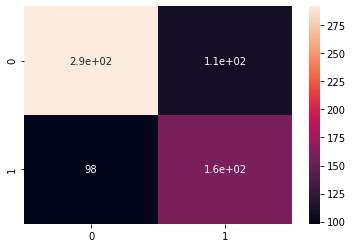

In [117]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)


In [119]:
classification_report(y_test, y_pred)


'              precision    recall  f1-score   support\n\n           0       0.75      0.73      0.74       400\n           1       0.59      0.62      0.61       256\n\n    accuracy                           0.69       656\n   macro avg       0.67      0.67      0.67       656\nweighted avg       0.69      0.69      0.69       656\n'